## Assignment No. 9 – Implementation of Time Series Analysis (TSA) Models
### Name : Ankita Balu Navatre
### PRN : 2122000302
### Roll No : AM24

### A.Perform basic operations on TSA dataset.

#### 1. Import the 'MSFT' Time Series data using yahoo finance.

In [11]:
import pandas as pd
import numpy as np
import yfinance as yf

In [12]:
msft=yf.download('MSFT')

[*********************100%***********************]  1 of 1 completed


In [13]:
msft

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
1986-03-13,0.059946,0.097222,0.101563,0.088542,0.088542,1031788800
1986-03-14,0.062087,0.100694,0.102431,0.097222,0.097222,308160000
1986-03-17,0.063158,0.102431,0.103299,0.100694,0.100694,133171200
1986-03-18,0.061552,0.099826,0.103299,0.098958,0.102431,67766400
1986-03-19,0.060482,0.098090,0.100694,0.097222,0.099826,47894400
...,...,...,...,...,...,...
2024-11-13,425.200012,425.200012,429.329987,418.209991,421.640015,21502200
2024-11-14,426.890015,426.890015,428.170013,420.000000,425.000000,30246900


#### 2. Calculate Simple Moving Average (SMA)

In [14]:
# Calculate the Simple Moving Average (SMA) with a 50-day
msft['SMA_20']=msft['High'].rolling(window=20).mean()
msft['SMA_20']

Date
1986-03-13           NaN
1986-03-14           NaN
1986-03-17           NaN
1986-03-18           NaN
1986-03-19           NaN
                 ...    
2024-11-13    424.712000
2024-11-14    424.995500
2024-11-15    425.153000
2024-11-18    425.125000
2024-11-19    424.493001
Name: SMA_20, Length: 9751, dtype: float64

In [15]:
# Calculate the Simple Moving Average (SMA) with a 3-day
msft['SMA_3']=msft['High'].rolling(window=3).mean()
msft['SMA_3']

Date
1986-03-13           NaN
1986-03-14           NaN
1986-03-17      0.102431
1986-03-18      0.103010
1986-03-19      0.102431
                 ...    
2024-11-13    426.193329
2024-11-14    427.313334
2024-11-15    426.766663
2024-11-18    423.123332
2024-11-19    419.713328
Name: SMA_3, Length: 9751, dtype: float64

#### 3. Calculate Exponential Moving Average (EMA)

In [16]:
# Calculate the Exponential Moving Average (EMA) with a 10-day span
msft['EMA_10'] = msft['Close'].ewm(span=10, adjust=False).mean()
msft['EMA_10']

Date
1986-03-13      0.097222
1986-03-14      0.097853
1986-03-17      0.098686
1986-03-18      0.098893
1986-03-19      0.098747
                 ...    
2024-11-13    420.965024
2024-11-14    422.042295
2024-11-15    420.761878
2024-11-18    419.852447
2024-11-19    419.477458
Name: EMA_10, Length: 9751, dtype: float64

In [17]:
# Calculate the Exponential Moving Average (EMA) with a 3-day span
msft['EMA_3'] = msft['Close'].ewm(span=3, adjust=False).mean()
msft['EMA_3']

Date
1986-03-13      0.097222
1986-03-14      0.098958
1986-03-17      0.100694
1986-03-18      0.100260
1986-03-19      0.099175
                 ...    
2024-11-13    423.306667
2024-11-14    425.098341
2024-11-15    420.049170
2024-11-18    417.904590
2024-11-19    417.847299
Name: EMA_3, Length: 9751, dtype: float64

#### 4. Calculate Weighted Moving Average (WMA)

In [22]:
def calculate_wma(data,window):
    weights=np.arange(1,window+1)
    
    return data.rolling(window).apply(lambda prices: np.dot(prices,weights)/weights.sum(),raw=True)

In [24]:
msft['wma_10']=calculate_wma(msft['Close'],10)
msft['wma_10']

Date
1986-03-13   NaN
1986-03-14   NaN
1986-03-17   NaN
1986-03-18   NaN
1986-03-19   NaN
              ..
2024-11-13   NaN
2024-11-14   NaN
2024-11-15   NaN
2024-11-18   NaN
2024-11-19   NaN
Name: wma_10, Length: 9751, dtype: float64

In [25]:
msft['wma_3']=calculate_wma(msft['Close'],3)
msft['wma_3']

Date
1986-03-13           NaN
1986-03-14           NaN
1986-03-17      0.100984
1986-03-18      0.100839
1986-03-19      0.099392
                 ...    
2024-11-13    423.278341
2024-11-14    425.683345
2024-11-15    420.663340
2024-11-18    417.361674
2024-11-19    416.648341
Name: wma_3, Length: 9751, dtype: float64

#### 5. Plot the visualizations

In [27]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


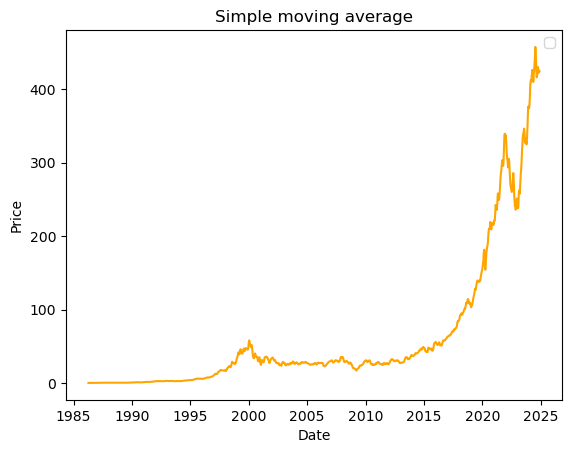

In [28]:
plt.plot(msft['SMA_20'],color='orange')
plt.title('Simple moving average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

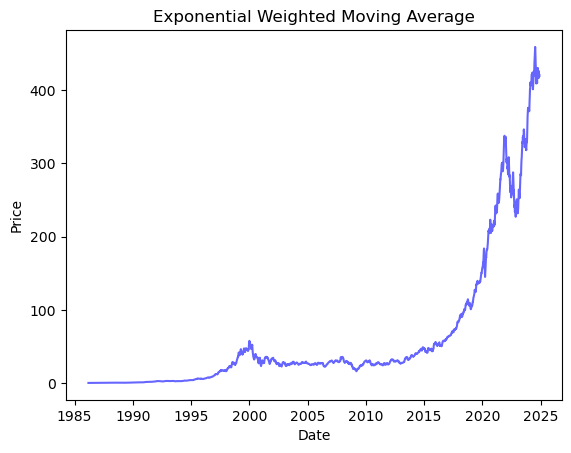

In [32]:
plt.plot(msft['EMA_10'],color='blue',alpha=0.6)
plt.title('Exponential Weighted Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

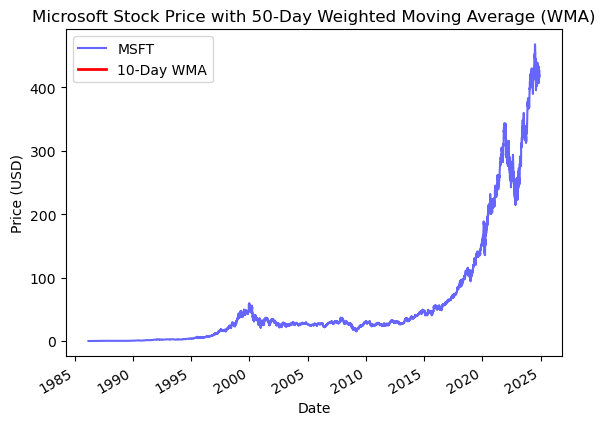

In [41]:
msft['Close'].plot(label='Close Price', color='blue', alpha=0.6)
msft['wma_10'].plot(label='10-Day WMA', color='red', linewidth=2)
plt.title('Microsoft Stock Price with 50-Day Weighted Moving Average (WMA)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

### 6. Implement ARMA model on the dataset ‘airline_passengers.csv’.

In [42]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df=pd.read_csv("airline_passengers.csv")

In [44]:
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,NaN,NaN


In [45]:
df.isnull().sum()

Month                      1
Thousands of Passengers    2
dtype: int64

In [46]:
df.tail()

,Month,Thousands of Passengers
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,NaN,NaN
145,International airline passengers: monthly tota...,NaN


In [47]:
df.dropna(axis=0,inplace=True)

In [48]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [50]:
df.dtypes

Month                       object
Thousands of Passengers    float64
dtype: object

In [51]:
df['Month']=pd.to_datetime(df['Month'])

In [52]:
df['Month']

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [53]:
df.set_index('Month',inplace=True)

<AxesSubplot:xlabel='Month'>

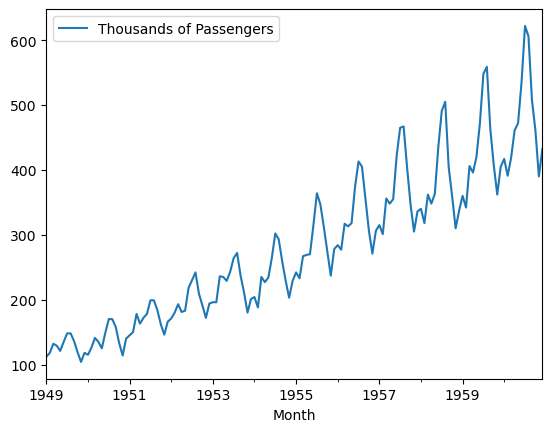

In [54]:
df.plot()

In [55]:
df['Passengers first diff']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)

In [56]:
df['Passengers second diff']=df['Passengers first diff']-df['Passengers first diff'].shift(1)

In [57]:
df['Passengers 12 diff']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)

In [58]:
df

,Thousands of Passengers,Passengers first diff,Passengers second diff,Passengers 12 diff
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


### 7. Plot the ACF and PACF graphs.

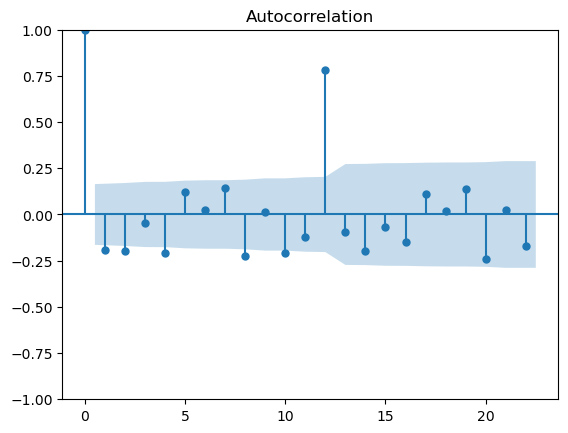

In [59]:
acf=plot_acf(df['Passengers second diff'].dropna())

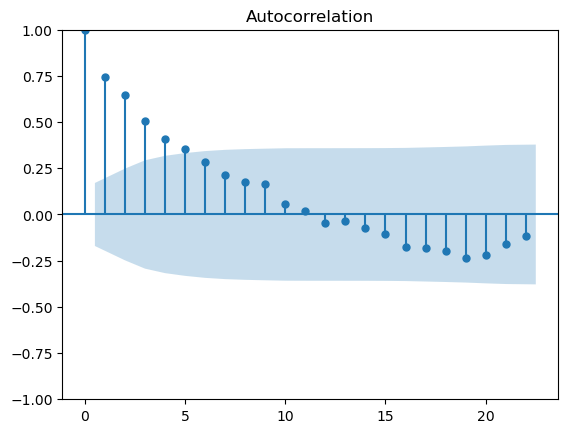

In [60]:
acf12=plot_acf(df['Passengers 12 diff'].dropna())

C:\Users\ANKITA\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


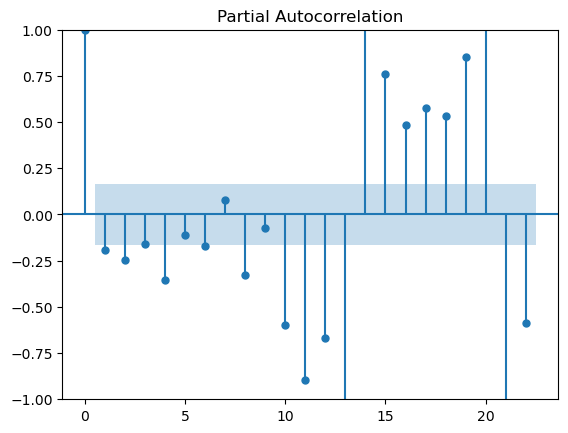

In [61]:
pacf=plot_pacf(df['Passengers second diff'].dropna())

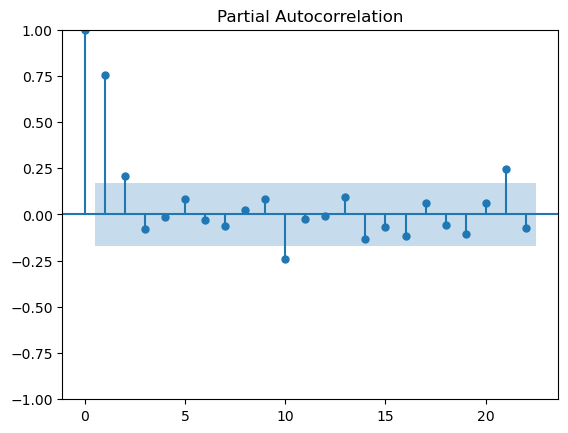

In [62]:
pacf12=plot_pacf(df['Passengers 12 diff'].dropna())